<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/la-conga-machinelearning/la-conga-machinelearning-student/-/raw/main/imgs/banner_DA.png"  width="1000px" height="250px">

# <center> **03. Machine Learning: More methods** </center>



## **Outline**
1. [**Decision Trees (DT)**](#eje1)
2. [**Random Forest (RF)**](#eje2)
3. [**Support vector Machine (SVM)**](#eje3)
4. [**Classification Boundaries**](#topic4)
5. [**Overfitting and underfitting**](#topic5)




In [ ]:
#@title **Execute this cell**
#@markdown Please include your student id
import sys
import inspect

group_id = "ML-20221-Laconga" #@param {type:"string"}
assignment_id = group_id +'.machine_learning'
student_id = "2218109" #@param {type:"string"}
"""
Put your student ID here

Example: student_id =  '2152145'
""" 

"\nPut your student ID here\n\nExample: student_id =  '2152145'\n"

In [ ]:
#@title **Execute this cell**
#@markdown **UTILS**
#@markdown Please dont modify any line in this cell

import os
import json
import requests
from collections import namedtuple


Config = namedtuple('Config', ['server_name'])
config = Config(server_name='https://bivlabgrader.azurewebsites.net/api')


def check_solution_and_evaluate(assignment_id: str, student_func_str: str):

    # Set the endpoint and payload.
    payload = {
        'func_str': student_func_str,
        'assignment_id': assignment_id,
        'student_id': student_id
    }
    endpoint_url = config.server_name + '/CheckAndEvaluateSolution'
    # print(endpoint_url)

    # Make request to server with the data coming from the notebook.
    r = requests.post(endpoint_url, params=payload)
    pprint_json_response(r.json())
    return r


def pprint_json_response(response, indent=0):
    """Pretty print the response."""
    for key, value in response.items():
        print('\t' * indent + str(key.capitalize()))

        # If dictionary, do a recurrent call.
        if isinstance(value, dict):
            pprint_json_response(value, indent + 1)
        else:
            # Enumerate elements if list.
            if isinstance(value, list):
                if len(value) == 1:
                    print('\t' * (indent + 1) + str(value[0]))
                else:
                    for i, e in enumerate(value, start=1):
                        print('\t' * (indent + 1) + f'{i}. {e}')
            else:
                print('\t' * (indent + 1) + str(value))

In [ ]:
#@title **MONTAR EL DRIVE** { display-mode: "form" }
import os
from google.colab import drive

path_ai = "course-AI/ai-uis-student" #@param {type:"string"}
path = "/content/drive/My Drive/" + path_ai
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive/course-AI/ai-uis-student


In [ ]:
#@title **Load libs** { display-mode: "form" }
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
pd.__version__

'1.3.5'

**Load a dataset to explore other ML alternatives in classification**

- To get a classifier using a particular partition (train=80, test=20)

In [ ]:
#@title **code** Train-test split
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *

d = pd.read_csv("data/data_banknote_authentication.txt.gz")
print(d)
X = d.values[:,:-1]
y = d.values[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
est = GaussianNB()
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

NameError: ignored

In [ ]:
#@title **code** some metrics

def tpr(est,X,y):
    p = est.predict(X)
    return np.mean (p[y==1] == y[y==1])

def tnr(est,X,y):
    p = est.predict(X)
    return np.mean(p[y==0] == y[y==0])

# **1. Decision Tree classifier**  <a name="eje1"></a>

The idea is to create a model that predicts the value of a target variable based on several input variables. The observations about an item is represented in the branches and the conclusions about the item's target value represented in the leaves


- Tree models where the target variable can take a discrete set of values are called **classification trees**
- Decision trees where the target variable can take continuous values (typically real numbers) are called **regression trees**

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/-/raw/master/imgs/CART_tree_titanic_survivors.png" width="700">


- During **training** a set of thresholds are learned from several optimization algorithm (entropy, gini_inpurity). The number of thresholds define the levels of each decision tree. 

- DT can understood as `if-then` structures that split recursively a feature
- Classification trees are a greedy algorithm which means by default it will continue to split until it has a pure node. 

- The DT may be sensible because their random initialization and construction of trees. With `random_state=0` you obtain a pseudo-random experiment. 
- Observe the natural implementation from `sklearn`


In [ ]:
#@title **code:** working with decision trees
from sklearn.tree import DecisionTreeClassifier

est = DecisionTreeClassifier(max_depth=2)
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.9018181818181819


In [ ]:


#@title **code: working with decision trees and cross validation**
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

est = DecisionTreeClassifier(max_depth=2)

s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print("tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print("tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.899 (+/- 0.02805)
tpr      0.853 (+/- 0.05588)
tnr      0.937 (+/- 0.02019)


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

Compute precision and Recall for this strategy in the train-test split configuration. 

**Many times is useful to know what features are more important to classify!**

In [ ]:
#@title **code**
est.fit(X_train,y_train)
est.feature_importances_

array([0.7163941 , 0.20810186, 0.07550404, 0.        ])

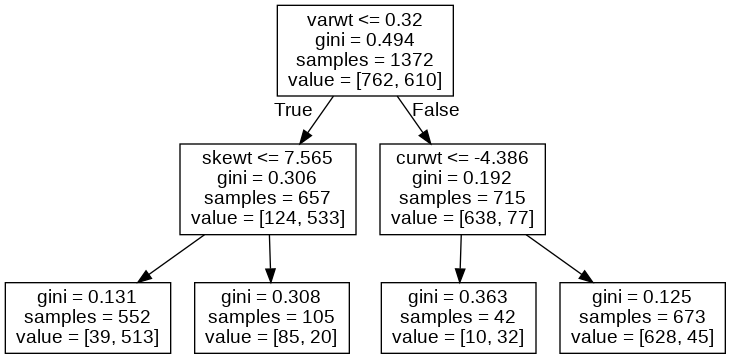

In [ ]:
#@title **code** Visualize the resultant tree
#!sudo apt-get install graphviz
from sklearn.tree import export_graphviz
from IPython.display import Image
est.fit(X, y)
export_graphviz(est, out_file='tree_c.dot', feature_names=d.columns[:-1].values)
!dot -Tpng tree_c.dot > tree_c.png

Image(filename='tree_c.png') 

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Perform a classification using the most detected important features. Which classifier is best?

- Drawn the restulant tree for the best configuration

- Change hyperparameters of DT to observe performance

# **2. Random Forest classifier (RFC)** <a name="eje2"></a>

Many times the tree is dependent of features initialization and the output can be sensible. To overcome some of these problems, a set of trees can be built to perform the classification. Each tree give a result an agreement criteria is used to obtain the classification


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/-/raw/master/imgs/randomforest.jpeg" width="500">


In [ ]:
#@title **code:** working with a Random forest classifier
from sklearn.ensemble import RandomForestClassifier
est = RandomForestClassifier()
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.9963636363636363


In [ ]:
#@title **code** Implementing a Random forest classifier and a cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

est = RandomForestClassifier()

s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print("tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print("tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.993 (+/- 0.00606)
tpr      0.994 (+/- 0.00784)
tnr      0.992 (+/- 0.00827)


In [ ]:
#@title **code** classification report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)
est = RandomForestClassifier()

est.fit(X_train,y_train)
y_pred = est.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       235
         1.0       0.99      1.00      1.00       177

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Compute precision and Recall for this training-test results

- Evalaute other configuration of RF, for instance, using other number of trees. 

# **3. Support vector machine (SVM)** <a name="eje3"></a>

This strategy is one of the most know machine learning thecnique. It is based on learn a model to separate two classes, which are represented as vectors. 

- The examples are used to find best vectors **(support vectors)** that better split the learning space. This support vectors are closer to the hiperplane. 

- The **main** goal is to **maximize** the classifier margin, described between the **support vectors**

- Example: 
    - H1 **No** separa las clases
    - H2 perform a separation with little margin
    - H3 bult boundaries that separate both classes with maximum margin
- **Marginn**: maximum distance between the hiperplane and data

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/-/raw/master/imgs/svm_diagram.png" width="1000">


In [ ]:
#@title **code** SVM classification
from sklearn.svm import SVC
est = SVC()
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.9927272727272727


In [ ]:
#@title **code** SVM classification and cross validation
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

est = SVC()

s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print("tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print("tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.997 (+/- 0.00669)
tpr      1.000 (+/- 0.00000)
tnr      0.995 (+/- 0.00835)


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Compute precision and Recall for this training-test results

- Evalaute other configuration of RF, for instance, using other number of trees.

# 4. **Classification Boundaries**

Regarding the machine learning classification, we design, model and build strategies to separate train examples. In other words, separate samples means to create boundaries. According to the assumptions of each strategy, each model build different boundaries. 

Now, we can see how to separate examples. We are using a toy dataset, it is **generated everytime** by deafult. 

- Take a moment to see `make_moons` dataset. 

In [ ]:
%run -i notes/utils.py
from sklearn import datasets
from sklearn.datasets import *


Graphviz already installed


0.02s
0.04s
0.03s


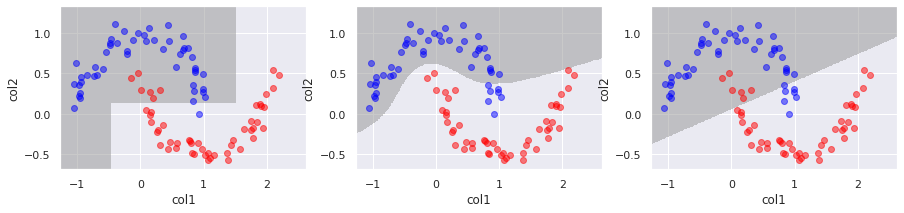

In [ ]:
#@title **code** computing boundaries
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import time

dt = DecisionTreeClassifier(max_depth=2)
sv = SVC(kernel="poly",  degree=3, gamma=2)
lr = LogisticRegression()

estimators = [ dt, sv, lr ]

X,y = make_moons(100, noise=0.1)

plt.figure(figsize=(15,3))
for i, estimator in enumerate(estimators):
    plt.subplot(1,3,i+1)
    t0 = time.time()
    estimator.fit(X,y)
    plot_2Ddata_with_boundary(estimator.predict, X,y)
    t1 = time.time()
    print( ('%.2fs' % (t1 - t0)))
    plt.xlabel("col1"); plt.ylabel("col2")
    

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">


- change the `max_deph` on the decision tree to 1, to 3 or more and observe the decision tree it is generated
- change the kernel, degree and gamma parameter of the SVC.
- see **help** on each estimators to see available paramet

# 5. **Overfitting and underfitting**

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/-/raw/master/imgs/under-over-fitting.png" width="1000">



Let's supose now we have a noisier dataset. 

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- what would be the "natural" classification boundary for this dataset?
- what accuracy would you expect to get?

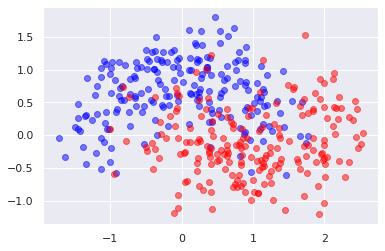

In [ ]:
#@title **code** Noise dataset
X,y = make_moons(400, noise=0.4)
plot_2Ddata_with_boundary(None, X,y)

In [ ]:

#@title **code** to plot
#@markdown we now use a 50/50 random split to train and to test
def plot_train_test(estimator, Xtr, Xts, ytr, yts, alpha=.5):
    estimator.fit(Xtr,ytr)
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    plot_2Ddata_with_boundary(estimator.predict, Xtr,ytr, alpha=alpha)
    plt.title("TRAIN accuracy %.3f"%estimator.score(Xtr, ytr))
    plt.subplot(122)
    plot_2Ddata_with_boundary(estimator.predict, Xts,yts, alpha=alpha)
    plt.title("TEST accuracy %.3f"%estimator.score(Xts, yts))


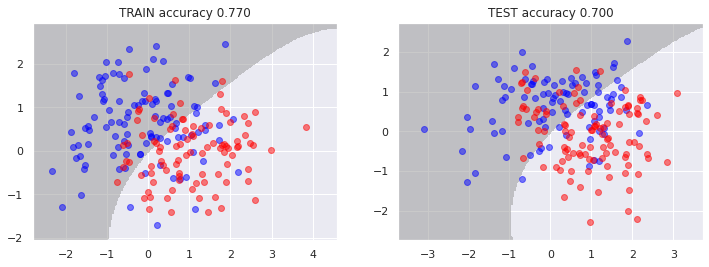

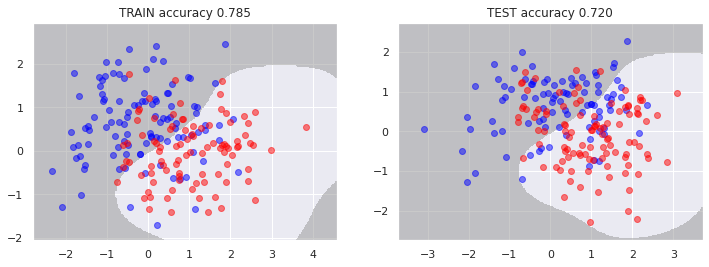

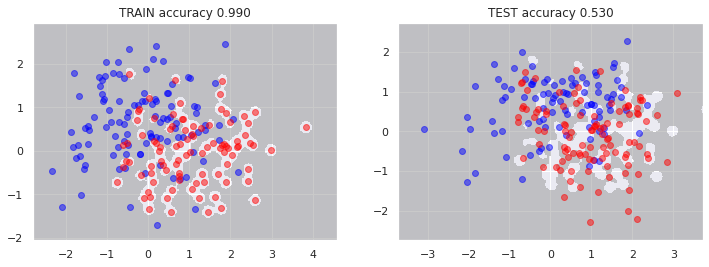

In [ ]:
#@title **code** SVM with different hyperparameters
from sklearn.model_selection import train_test_split
X,y = make_moons(400, noise=0.7)
Xtr, Xts, ytr, yts = train_test_split(X,y, test_size=.5)

plot_train_test(SVC(kernel="rbf",  gamma=.1), Xtr, Xts, ytr, yts)
plot_train_test(SVC(kernel="rbf",  gamma=1), Xtr, Xts, ytr, yts)
plot_train_test(SVC(kernel="rbf",  gamma=100), Xtr, Xts, ytr, yts)


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

Evaluate **overfitting and underfitting** examples over breast cancer dataset and anknote_authentication dataset


# **References**

[1] Tutorial on k-fold cross validation https://machinelearningmastery.com/k-fold-cross-validation/

[2] Titanic dataset. https://www.kaggle.com/c/titanic

[3] Sensitivity and specificity: https://en.wikipedia.org/wiki/Sensitivity_and_specificity

---
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerThanks.jpg" alt="Drawing" style="width:700px;">
